<a href="https://colab.research.google.com/github/RAIGOZAGIAN1997/MineriaDatos/blob/main/Practicas_Mineria_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRACTICAS MINERIA DE DATOS**

* Nombre: Gian Molina Raigoza
* Matricula:1636155
* Datebase: Blockbuster Movies

**Practicas**

1.- Adquisición de datos

2.- Limpieza de datos.

3.- Análisis de datos.

4.- Graficación.

5.- Prueba de hipótesis.

6.- Regresión lineal

7.- Predicciones





In [1]:

#Se importan las librerias necesarias para realizar las practicas correspondientes
import requests
import io
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
from tabulate import tabulate
from typing import Tuple, List
import re
from datetime import datetime
import matplotlib.pyplot as plt
#Se carga el documento CSV a analizar

def get_soup(url: str) -> BeautifulSoup:
    response = requests.get(url)
    return BeautifulSoup(response.content, 'html.parser')

def get_csv_from_url(url:str) -> pd.DataFrame:
    s=requests.get(url).content
    return pd.read_csv(io.StringIO(s.decode('utf-8')))

def print_tabulate(df: pd.DataFrame):
    print(tabulate(df, headers=df.columns, tablefmt='orgtbl'))
    
df = get_csv_from_url("https://raw.githubusercontent.com/RAIGOZAGIAN1997/MineriaDatos/main/blockbuster-top_ten_movies_per_year_DFE.csv")

In [2]:
#La información del CSV se transforma en Dataframe
#df = pd.read_csv(io.BytesIO(subircsv['blockbuster-top_ten_movies_per_year_DFE.csv'])) 
#Se renombra los nombres de las columnas en español
df.rename({'title': 'Titulo','studio': 'Estudio', 'Genre_1': 'Genero','imdb_rating': 'IMDB', 'year': 'Año','worldwide_gross': 'Recaudación'}, axis=1, inplace=True)
#Se coloca 0 en los años donde no hay información
df['Año'] = df['Año'].fillna(0)
#Se transforma los años flotantes en enteros
df['Año'] = df['Año'].astype(np.int64, errors='ignore')
#Se eliminan valores nulos
df = df.dropna()

In [3]:
#Se crea el DataFrame final en el que se va trabajar
df_final = pd.DataFrame.from_dict(df.loc[:,['Estudio','Titulo','Genero','IMDB','Año','Recaudación']])
#Se comprueba el dataframe con los nuevos nombres y las columnas seleccionadas
df_final.head(500)

,Estudio,Titulo,Genero,IMDB,Año,Recaudación
0,Marvel Studios,Captain America: The Winter Soldier,Sci-Fi,7.8,2014,"$714,766,572.00"
1,20th Century Fox,Dawn of the Planet of the Apes,Sci-Fi,7.7,2014,"$708,835,589.00"
2,Marvel Studios,Guardians of the Galaxy,Sci-Fi,8.1,2014,"$774,176,600.00"
4,Walt Disney Pictures,Maleficent,Family,7.1,2014,"$758,654,942.00"
5,Columbia Pictures,The Amazing Spider-Man 2,Fantasy,6.9,2014,"$709,582,323.00"
...,...,...,...,...,...,...
392,Columbia Pictures,Funny Lady,Musical,6.4,1975,"$39,000,000.00"
394,Walt Disney Productions,The Apple Dumpling Gang,Western,6.2,1975,"$36,853,000.00"
395,Universal Pictures,The Other Side of the Mountain,Drama,6.4,1975,"$34,673,100.00"
396,United Artists,The Return of the Pink Panther,Mystery,7.1,1975,"$41,833,347.00"


In [4]:
#Se ordena por su clasificación IMDB de manera descendente
Ordenar_IMDB = df_final.sort_values('IMDB',ascending=False)
Ordenar_IMDB.head(10)


,Estudio,Titulo,Genero,IMDB,Año,Recaudación
68,Warner Bros. / Legendary,The Dark Knight,Drama,9.0,2008,"$997,000,000.00"
215,Universal Pictures / Amblin Entertainment,Schindler's List,History,8.9,1993,"$321,306,305.00"
116,New Line,The Lord of the Rings: The Return of the King,Fantasy,8.9,2003,"$1,119,929,521.00"
346,20th Century Fox,Star Wars Episode V: The Empire Strikes Back,Adventure,8.8,1980,"$209,398,025.00"
44,Warner Bros. / Legendary,Inception,Sci-Fi,8.8,2010,"$825,531,030.00"
197,New Line Cinema,Seven,Mystery,8.7,1995,"$327,311,859.00"
376,Lucasfilm / 20th Century Fox,Star Wars,Fantasy,8.7,1977,"$307,263,857.00"
167,DreamWorks Pictures / Paramount Pictures,Saving Private Ryan,War,8.6,1998,"$481,840,909.00"
207,Walt Disney Pictures,The Lion King,Drama,8.5,1994,"$768,625,889.00"
290,Universal Pictures / Amblin Entertainment,Back to the Future,Romance,8.5,1985,"$210,609,762.00"


In [5]:
#Operaciones para conocer la máxima calificación y la minima calificación de IMDB
Clasificacion_peliculas  = df_final['IMDB']
maximo = max(Clasificacion_peliculas)
minimo = min(Clasificacion_peliculas)
print('La máxima calificación de IMDB es: ', maximo)
print('La minima calificación de IMDB es: ', minimo)

La máxima calificación de IMDB es:  9.0
La minima calificación de IMDB es:  4.4


In [6]:
#Obteniendo la media de calificaciones IMDB de las peliculas
Media_IMDB = df["IMDB"].mean()
#Obteniendo la mediana de calificaciones IMDB de las peliculas
Mediana_IMDB = df["IMDB"].median()
#Obteniendo la moda de calificaciones IMDB de las peliculas
Moda_IMDB = df["IMDB"].mode()
#Obteniendo la cantidad de calificaciones IMDB de las peliculas
Cantidad_IMDB = df_final["IMDB"].count()
#Obteniendo la suma de calificaciones IMDB de las peliculas
Suma_IMDB = df_final["IMDB"].sum()
#Obteniendo la kurtosisde calificaciones IMDB de las peliculas
IMDB_kurtosis=df_final["IMDB"].kurtosis()
#Obteniendo la varianza de calificaciones IMDB de las peliculas
IMDB_varianza=df_final["IMDB"].var()
#Obteniendo la desviación de calificaciones IMDB de las peliculas
IMDB_desviación=df_final["IMDB"].std()
#Imprimos los resultados
print('Media: ',Media_IMDB)
print('Mediana: ',Mediana_IMDB)
print('Moda: ',Moda_IMDB)
print('Cantidad de calificaciones: ',Cantidad_IMDB)
print('Suma de calificaciones: ',Suma_IMDB)
print('Kurtosis: ',IMDB_kurtosis)
print('Varianza: ',IMDB_varianza)
print('Desviación: ',IMDB_desviación)

Media:  6.989219330855021
Mediana:  6.9
Moda:  0    7.2
dtype: float64
Cantidad de calificaciones:  269
Suma de calificaciones:  1880.1000000000001
Kurtosis:  0.11911998201941998
Varianza:  0.6936520002219397
Desviación:  0.8328577310813292


In [7]:
#Limpiando y convirtiendo objecto a int de las Recaudaciones
df_final['Recaudación'] = pd.to_numeric(df_final['Recaudación'].str.replace(r"[^\d]", ""))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [8]:
#Comprobamos que se haya eliminado el $ y los decimales 
df_final.head(10)
#Se realiza la suma para comprobar cual es el estudio que mas vendio


,Estudio,Titulo,Genero,IMDB,Año,Recaudación
0,Marvel Studios,Captain America: The Winter Soldier,Sci-Fi,7.8,2014,71476657200
1,20th Century Fox,Dawn of the Planet of the Apes,Sci-Fi,7.7,2014,70883558900
2,Marvel Studios,Guardians of the Galaxy,Sci-Fi,8.1,2014,77417660000
4,Walt Disney Pictures,Maleficent,Family,7.1,2014,75865494200
5,Columbia Pictures,The Amazing Spider-Man 2,Fantasy,6.9,2014,70958232300
8,Paramount Pictures,Transformers: Age of Extinction,Sci-Fi,5.8,2014,109140449900
9,20th Century Fox,X-Men: Days of Future Past,Sci-Fi,8.1,2014,74812153400
10,Universal / Illumination,Despicable Me 2,Family,7.5,2013,97076188500
11,Universal,Fast & Furious 6,Thriller,7.2,2013,78867985000
12,Walt Disney Pictures,Frozen,Comedy,7.7,2013,127421900900


                                                      Recaudación
Estudio                                                          
Warner Bros.                                        1408260014000
Walt Disney Pictures                                 788009436000
Fox                                                  555829843500
20th Century Fox                                     545353198000
Paramount / DreamWorks                               532378732800
...                                                           ...
Columbia Pictures / Rastar                             5705900300
20th Century-Fox Film Corporation                      5107906400
Universal Studios / Cinema International Corpor...     4322000000
Embassy Pictures                                       4236558100
Walt Disney Productions                                3685300000

[75 rows x 1 columns]


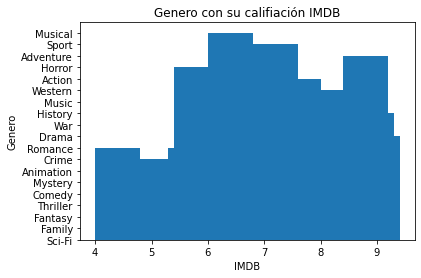

In [28]:
#Creamos un nuevo DataFrame con las mayores ventas por estudio
Ventas_Estudio = pd.DataFrame.from_dict(df_final.groupby('Estudio')['Recaudación'].sum())
#Ordenamos el estudio con mayor ventas
Ordenar_Recaudación = Ventas_Estudio.sort_values('Recaudación',ascending=False)
print(Ordenar_Recaudación)

#Graficamos para ver las calificaciones

eje_x = df_final['IMDB']
 
eje_y = df_final['Genero']

plt.bar(eje_x, eje_y)
 
## Legenda en el eje y
plt.ylabel('Genero')
 
## Legenda en el eje x
plt.xlabel('IMDB')
 
## Título de Gráfica
plt.title('Genero con su califiación IMDB')
 
## Mostramos Gráfica
plt.show()


SyntaxError: ignored